In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
!nvidia-smi

Tue Mar 11 19:14:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

The MNIST dataset is a collection of 70,000 handwritten digits from 0 to 9
The dataset is split into 60,000 training samples and 10,000 test samples
Each sample is a grayscale image of size 28 x 28 pixels
The pixel values range from 0 (black) to 255 (white)

In [3]:
# Load the MNIST dataset from web
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Dataset sizes
print('X_train shape:', X_train.shape) # (60000, 28, 28) - 60000 training samples, each is a 28x28 grayscale image
print('y_train shape:', y_train.shape) # (60000,) - 60000 training labels (integers 0-9)
print('X_test shape:', X_test.shape)  # (10000, 28, 28) - 10000 testing samples, each is a 28x28 grayscale image
print('y_test shape:', y_test.shape)  # (10000,) - 10

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


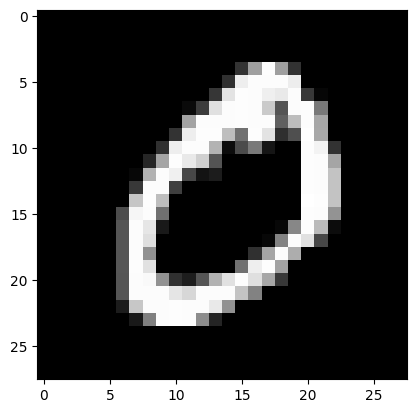

In [4]:
# Show an example image from the dataset
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [5]:
# Print the label of the example image
print("Label:", y_train[0])

Label: 5


In [6]:
# Preprocess the data
# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the labels to one-hot vectors
# One-hot encoding is a way to represent categorical data as numerical data
# It works by creating a binary vector for each category
# The vector has a length equal to the number of categories
# All elements of the vector are 0, except for the element corresponding to the category being represented, which is 1
# For example, if we have 3 categories (cat, dog, bird), the one-hot vectors would be:
# cat: [1, 0, 0]
# dog: [0, 1, 0]
# bird: [0, 0, 1]
# In the MNIST dataset, we have 10 categories (digits 0-9)
# So the one-hot vectors will have a length of 10
# For example, the digit 5 would be represented as [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

y_train = to_categorical(y_train) # This line converts the training labels to one-hot vectors
y_test = to_categorical(y_test)   # This line converts the testing labels to one-hot vectors

In [7]:
y_train[0] # Note: The fifth element is 1.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [8]:
# Reshape the training and testing data to a 2D array of shape (n_samples, n_features)
# This is necessary because the input to a Dense layer must be a 2D array
# where each row represents a sample and each column represents a feature

X_train = X_train.reshape((X_train.shape[0], -1))
# X_train.shape[0] keeps the number of samples (60000)
# -1 automatically calculates the number of features (28*28 = 784) to flatten the remaining dimensions

X_test = X_test.reshape((X_test.shape[0], -1))
# Same logic as for X_train, but for the test data (10000 samples)


# Print the new shape of the training and testing data
print("Training data shape:", X_train.shape) # (60000, 784)
print("Testing data shape:", X_test.shape)   # (10000, 784)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


Note: The flattening step reshape the training and testing data to a 2D array of shape (n_samples, n_features)

In [9]:
# Define the model
model = Sequential()  # Create a sequential model (layers are added in order)
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
# Add a dense layer with:
# - 128 neurons (units)
# - ReLU activation function (introduces non-linearity)
# - input_dim: Number of features in the input data (784 in this case, as each image is flattened to a 784-dimensional vector)

model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
# Add another dense layer with 128 neurons and ReLU activation

model.add(Dense(10, activation='softmax'))
# Add an output layer with:
# - 10 neurons (one for each digit 0-

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# optimizer: 'adam' - Adam is an optimization algorithm that is used to update the weights of the model during training.
# It is a popular choice because it is efficient and effective.
# loss: 'categorical_crossentropy' - This is the loss function that is used to measure the difference between the predicted output and the true output.
# It is a common choice for multi-class classification problems.
# metrics: ['accuracy'] - This is the metric that is used to evaluate the performance of the model.
# Accuracy is the percentage of correctly classified samples.

# Summary of the model
model.summary() # Prints a summary representation of your model.
# This will display the layers of the model, the output shape of each layer, and the number of parameters in each layer.
# It is a useful way to get an overview

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8862 - loss: 0.4005 - val_accuracy: 0.9675 - val_loss: 0.1011
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9702 - loss: 0.0961 - val_accuracy: 0.9721 - val_loss: 0.0880
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9778 - loss: 0.0691 - val_accuracy: 0.9747 - val_loss: 0.0769


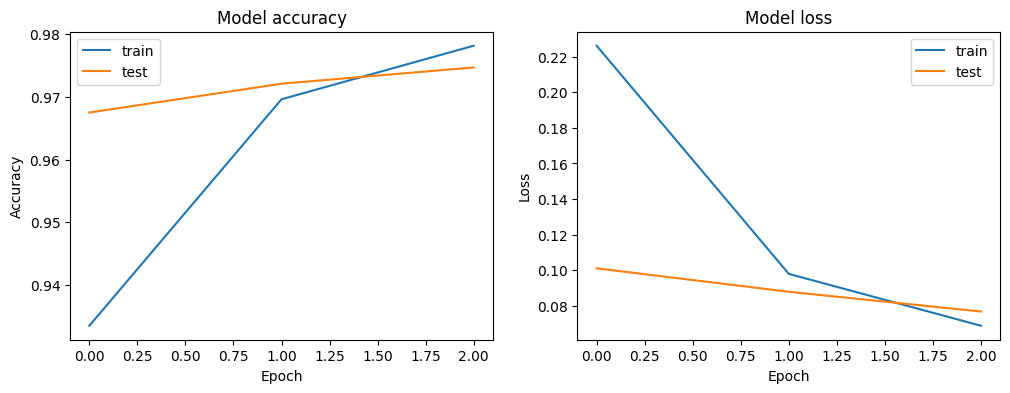

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.0915
Test loss: 0.07687839865684509
Test accuracy: 0.9746999740600586


In [12]:
# Plot the learning curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


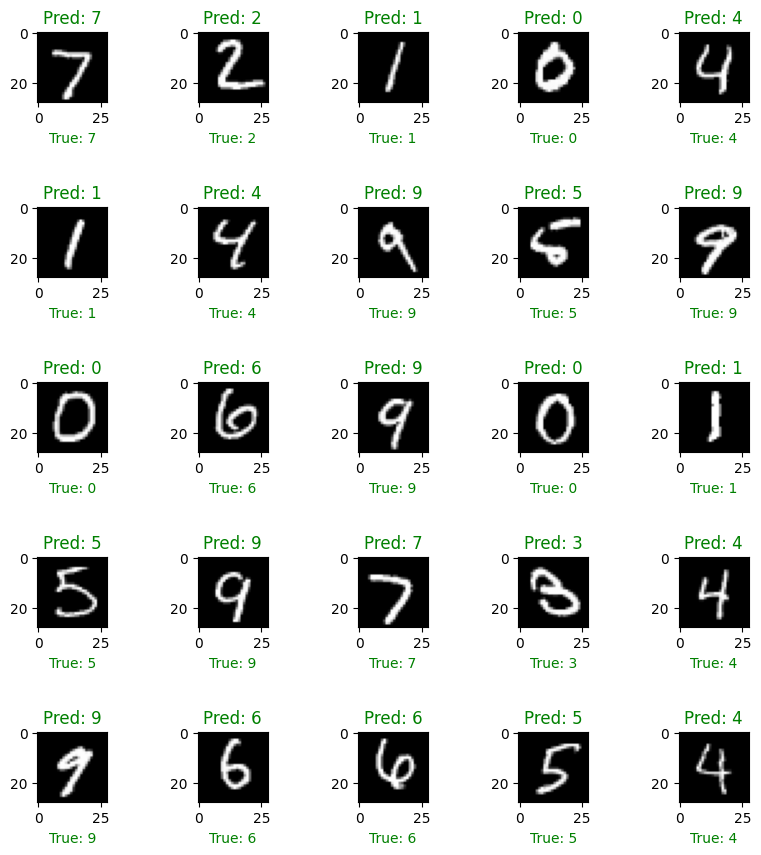

In [13]:
# Make predictions on some test samples
predictions = model.predict(X_test[:25])
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:25], axis=1)

# Plot the predictions and the true labels
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  color = 'green' if pred_labels[i] == true_labels[i] else 'red'
  plt.title('Pred: ' + str(pred_labels[i]), color=color)
  plt.xlabel('True: ' + str(true_labels[i]), color=color)
plt.subplots_adjust(hspace=1.5)  # increase vertical space between subplots
plt.show()

# Exercises

1. Modify the model to add another hidden layer with 64 neurons and ReLU activation.

2. How does this affect the model performance and training time?
Experiment with different values of the batch size and the number of epochs in the model.fit() method. How do they affect the model accuracy and loss?

3. Using the predicted labels for the entire test set, compute and plot the confusion matrix. Which digits are most often confused by the model?

4. Use the model.save() method to save the trained model as a HDF5 file. Then, use the tensorflow.keras.models.load_model() function to load the saved model and evaluate it on the test set. Do you get the same results as before?
5. Use the model.summary() method to print the summary of the model. Now manually calculate the trainable parameters yourself. Show your calculation.
